###### Les données ont été extraites d'images qui ont été prises à partir d'échantillons de billets de banque "authentiques" et "falsifiés" de billets de banque. Pour la numérisation, une caméra industrielle habituellement utilisée pour l'inspection d'impression a été utilisée. Les images finales ont 400x 400 pixels. En raison de la lentille de l'objet et de la distance par rapport à l'objet étudié, des images en niveaux de gris avec une résolution d'environ 660 dpi ont été obtenues. L'outil de transformation en ondelettes a été utilisé pour extraire des caractéristiques des images.
###### Les caractéristiques obtenus sont: 
###### 1. La variance de la transformation en ondelettes (continuous)
###### 2. skewness de la transformation en ondelettes (continuous)
###### 3. curtosis de la transformation en ondelettes (continuous)
###### 4. entropy de l'image (continuous)
###### 5. class (integer)

In [0]:
#Importer les librairies necessaires:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

In [0]:
#Importer le dataset "BilletsBanque"
data = pd.read_table("BilletsBanque.xls", sep=",")
data.head()

Variance  Skewness  Curtosis  Entropy  Class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0

In [0]:
#dimensions : nombre de lignes, nombre de colonnes
data.shape

(1372, 5)

In [0]:
# Pas de valeurs manquantes
data.isna().sum()

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

In [0]:
# diviser les données en attributs et étiquettes (labes)
X = data.drop("Class", axis=1)
y = data["Class"]

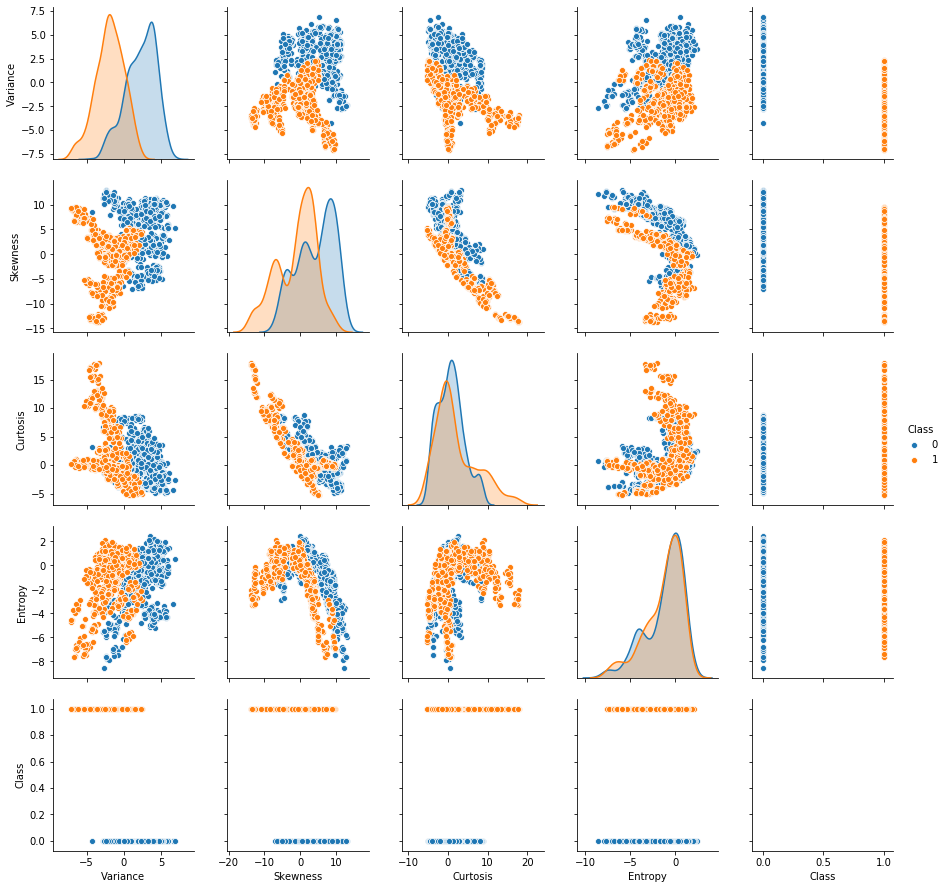

In [0]:
#graphique - croisement deux à deux des variables
import seaborn as sns
sns.pairplot(data, hue="Class")

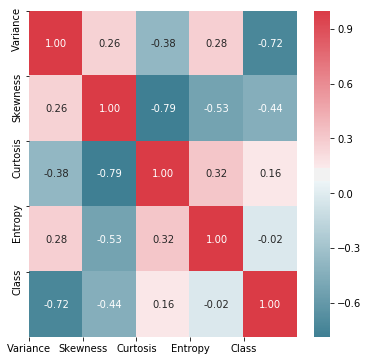

In [0]:
#graphique - croisement deux à deux des variables
#Create Correlation matrix
corr = data.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(6,6))
#Generate Color Map
colormap = sns.diverging_palette(220, 10, as_cmap=True)
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

In [0]:
# diviser les données en 80% training set  et 20% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

### Params par défaut

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

In [0]:
#Entrainer le modèle svm
svm = SVC()
svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
# Evaluer les performances du modèle

In [0]:
from sklearn.metrics import classification_report
y_pred_svc_1 = svm.predict(X_test)
print(classification_report(y_pred_svc_1, y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       152
           1       0.98      1.00      0.99       123

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



### Noyeau linéaire

In [0]:
# Kernel linéaire
svm = SVC(kernel="linear")
svm.fit(X_train, y_train)
from sklearn.metrics import classification_report
y_pred_svc_2 = svm.predict(X_test)
print(classification_report(y_pred_svc_2, y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       152
           1       0.98      1.00      0.99       123

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



### Noyeau polynomial

In [0]:
# Kernel poly
svm = SVC(kernel="poly")
svm.fit(X_train, y_train)
from sklearn.metrics import classification_report
y_pred_svc_3 = svm.predict(X_test)
print(classification_report(y_pred_svc_3, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       150
           1       1.00      1.00      1.00       125

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



### Noyeau Sigmoide

In [0]:
# Kernel sigmoid
svm = SVC(kernel="sigmoid")
svm.fit(X_train, y_train)
from sklearn.metrics import classification_report
y_pred_svc_4 = svm.predict(X_test)
print(classification_report(y_pred_svc_4, y_test))

              precision    recall  f1-score   support

           0       0.59      0.63      0.61       139
           1       0.59      0.54      0.57       136

    accuracy                           0.59       275
   macro avg       0.59      0.59      0.59       275
weighted avg       0.59      0.59      0.59       275



Les scores des noyeaux pour ce dataset sont :
1. Noyeau Gaussien : 1.00
2. Noyeau Polynomial : 1.00
3. Noyeau Linéaire : 0.99
4. Noyeau Sigmoide : 0.59

Nous pouvons conclure que les données suivent une forme polynomiale plus qu'une forme linéaire.

### Noyeau Gaussien RBF

In [0]:
# Kernel rbf (Par défaut)
svm = SVC(kernel="rbf")
svm.fit(X_train, y_train)
from sklearn.metrics import classification_report
y_pred = svm.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       150
           1       1.00      1.00      1.00       125

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



### Avec GridSearchCV

Nous allons faire varier les paramétres C et gamma en plus.

gamma: Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.


C:Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. 

In [0]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
print("Meilleurs paramétres trouvés par GridSeachCV")
print(grid.best_params_)

Meilleurs paramétres trouvés par GridSeachCV
{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


# Comparaison des résultats

## Tableau comparatif

Nous allons maintenant

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
# On va afficher un tableau qui ordonne les modèles du plus performant au moins performant suivant le score
s1=accuracy_score(y_test, y_pred_svc_1)
s2=accuracy_score(y_test, y_pred_svc_2)
s3=accuracy_score(y_test, y_pred_svc_3)
s4=accuracy_score(y_test, y_pred_svc_4)

models = pd.DataFrame({
    'Model': ['Support Vector Machines RBF', 'Support Vector Machines Linaire','Support Vector Machines polynomiale',
              'Support Vector Machines sigmoïde'],
    'Score': [s1,s2, s3, 
              s4]})
models.sort_values(by="Score",ascending=False)

Model     Score
2  Support Vector Machines polynomiale  1.000000
0          Support Vector Machines RBF  0.992727
1      Support Vector Machines Linaire  0.992727
3     Support Vector Machines sigmoïde  0.589091

### Courbe ROC

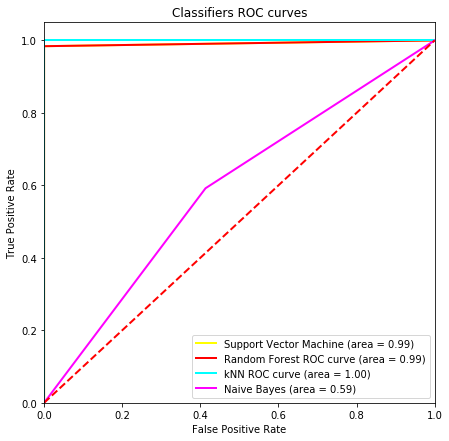

In [0]:
from sklearn.metrics import roc_curve, auc
fpr1, tpr1, threshold1 = roc_curve(y_test, y_pred_svc_1) 
roc_auc1 = auc(fpr1, tpr1)
fpr2, tpr2, threshold2 = roc_curve(y_test, y_pred_svc_2) 
roc_auc2 = auc(fpr2, tpr2)
fpr3, tpr3, threshold3 = roc_curve(y_test, y_pred_svc_3)
roc_auc3 = auc(fpr3, tpr3)
fpr4, tpr4, threshold4 = roc_curve(y_test, y_pred_svc_4) 
roc_auc4 = auc(fpr4, tpr4)
plt.figure(figsize=(7,7)) 
plt.plot(fpr1, tpr1, color='yellow', lw=2, label='Support Vector Machine (area = %0.2f)'% roc_auc1)
plt.plot(fpr2, tpr2, color='red', lw=2, label='Random Forest ROC curve (area = %0.2f)'% roc_auc2)
plt.plot(fpr3, tpr3, color='cyan', lw=2, label='kNN ROC curve (area = %0.2f)'% roc_auc3)
plt.plot(fpr4, tpr4, color='magenta', lw=2, label='Naive Bayes (area = %0.2f)'% roc_auc4)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Classifiers ROC curves') 
plt.legend(loc = "lower right")
plt.show()